## Introducción


Sin duda alguna los automóviles han sido y son parte esencial de la sociedad, su movilidad y su transporte, desafortunadamente los siniestros causados por ellos son parte inherente de su uso y el impacto de ellos repercute de manera directa o indirecta en la vida de los involucrados, pero también de las personas que los rodean.

De acuerdo con un reporte de la Organización Mundial de la Salud en 2017, los accidentes viales son causantes de más de 1.3 de millones de muertes al año, y un estimado de alrededor de 50 millones de personas con traumatismos no mortales siendo así la quinta causa de los fallecimientos mundiales anuales.

Aunado a lo anterior, la OMS ahonda en su reporte, indicando que el 93% de los accidentes de tránsito suceden en los países de ingresos bajos y medianos. De este 93%, 20% acaece en la región de las Américas, en donde las estadísticas reportan más de 155’000 muertes por año por accidentes automovilísticos.

Por su parte México y de acuerdo con los datos del Instituto Nacional de Salud Pública (INSP), el país se encuentra en el séptimo lugar a nivel mundial en el rubro de siniestros automovilísticos mortales, y ocupa el tercer lugar en la región de Latinoamérica en este mismo rubro

Además de las repercusiones sociales y humanas, los accidentes viales, representan en números un estimado de más de 220 mil millones de pesos en costos, cifra la cual supera el 2% del PIB del país. Eventualmente los costos no son todos absorbidos por las instituciones del gobierno, y es el propio usuario en quién recae la mayor cantidad de responsabilidad económica asociada al siniestro. De nuevo, este último factor es un atenuante para la sociedad puesto que, continuando con los estudios presentados por el INSP, en promedio el gasto por accidente alcanza un costo de alrededor de 25´000 pesos, y si a esto se le suma que derivado de los siniestros automovilísticos se suman alrededor de 50´000 personas al grupo de personas con discapacidad motora, de los cuáles 70% no vuelve a conseguir empleo. Los costos en seguridad social, reparación de daños, entre otros regresan para ser solventados por las instituciones de gobierno.

Bajo este tenor, y con el fin de atenuar la situación descrita anteriormente, resulta útil identificar cuáles son los factores que tienen mayor influencia en los choques automovilísticos, cuáles son los perfiles más propensos a generar un choque, y simultáneamente diseñar estrategias que permitan atacar las causas raíz de los siniestros automovilísticos en México.

## Seccion de lectura y Limpieza de datos

Empezamos por descargar los datos necesarios para el analisis lo cuales fueron recabados de la pagina del INEGI, estos se pueden encontrar en los siguientes enlaces:
* Diccionario de datos: [LINK](https://www.inegi.org.mx/rnm/index.php/catalog/506/)
* Pagina de los datos: [LINK](https://www.inegi.org.mx/programas/accidentes/)


In [1]:
import pandas as pd
url="https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/atus_anual_csv.zip"
file_name="atus_anual_1997_2019"

In [2]:
def descarga(url,file_name,n_file=0):
    import requests, zipfile, io,os.path
    if not os.path.exists(file_name):
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        if n_file==0:
            z.extractall("")
        else:
            z.extractall(file_name)
    return print("Descarga de archivos completa")

In [3]:
descarga(url,file_name)

Descarga de archivos completa


Lectura de los datos pertenecientes a los años 2010 - 2019

In [4]:
from os import listdir

filepaths = [f for f in listdir("atus_anual_1997_2019/conjunto_de_datos") if f.endswith('.csv')]

In [5]:
lista_archivos=list(map(lambda x: "atus_anual_1997_2019/conjunto_de_datos/"+x, sorted(filepaths,reverse=True)[:10]))

In [6]:
df = pd.concat(map(lambda archivo: pd.read_csv(archivo,index_col=False),lista_archivos))

Dataset Original perteneciente a accidentes en todo Mexico del 2010 al 2019

In [7]:
df.shape

(3841493, 45)

Tras la conjunción de todos los archivos obtuvimos un dataframe con 45 campos y 3,841,493 registros

In [8]:
df.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2019,1,1,5,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1,Municipal,1,1,2019,1,3,53,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
2,Municipal,1,1,2019,1,5,35,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2019,1,6,50,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
4,Municipal,1,1,2019,1,8,50,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


Para la acotación correspondiente a nuestro proyecto, Filtramos los datos pertenecientes a la Ciudad de Mexico cuyo codigo de entidad es 9

In [9]:
df_cdmx = df[df.ID_ENTIDAD==9]
df_cdmx = df_cdmx.reset_index(drop=True)

In [10]:
df_cdmx.shape

(136812, 45)

Tras el filtro para seleccionar únicamente a la CDMX, se obtuvo un datframe más pequeño con 136,812 registros. Continuando con el análisis exploratorio de los datos, examinamos el nombre de las columnas de la siguiente forma

In [11]:
df_cdmx.columns

Index(['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA',
       'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID',
       'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA',
       'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET',
       'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO',
       'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO',
       'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO',
       'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'CLASACC',
       'ESTATUS'],
      dtype='object')

A continuación se muestra la descrpición de los campos, la cual nos ayuda a entender mejor el significado de los datos de cada columnna. 

In [12]:
diccionario_datos=pd.read_csv("atus_anual_1997_2019/diccionario_de_datos/diccionario_de_datos_atus_anual_1997_2019.csv",
                              index_col="COLUMNA",usecols=[0, 1])
diccionario_datos.head()

,DESCRIPCION
COLUMNA,
COBERTURA,Área geográfica a la que están referidos los i...
ID_ENTIDAD,Clave de la entidad federativa según el Catálo...
ID_MUNICIPIO,Clave del municipio según el Catálogo de Entid...
ANIO,Los cuatro dígitos correspondientes al año en ...
MES,Correspondiente al mes de referencia en que oc...


Lista de los campos y su descripción.

In [13]:
def imprimir_descripcion(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

imprimir_descripcion(diccionario_datos, 800)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  DESCRIPCION
COLUMNA                                                                                                                                                                                   

Igualmente de la siguiente forma podemos elegir el nombre de la columna de la cual queremos obtener la descripcion 

In [14]:
list(diccionario_datos.loc["ID_MUNICIPIO"])

['Clave del municipio según el Catálogo de Entidades, Municipios y Localidades del INEGI']

Examinando la Columna ``ID_MUNICIPIO`` podemos observar que son solo numeros, por lo cuel seria mejor trabajar con nombre de los municipios en lugar de numero. Por lo cual cambiaremos esta columna. Para lograrlo importamos la informacion perteneciente al nombre del municipio asociado con su ID.

In [15]:
#Lectura del nombre pertenecientes a las delegaciones
delegacion_nombre=pd.read_csv("atus_anual_1997_2019/catalogos/tc_municipio.csv",index_col=False)

Examinando el archivo podemos observar que son solo 3 columnas por lo cual filtramos los datos para obtener solo los municipios pertencecientes a la CDMX los cuales deben de ser 16

In [16]:
delegacion_nombre=delegacion_nombre[(delegacion_nombre.ID_ENTIDAD==9)&(delegacion_nombre.ID_MUNICIPIO!=999)]
delegacion_nombre.head()

,ID_ENTIDAD,ID_MUNICIPIO,NOM_MUNICIPIO
278,9,2,Azcapotzalco
279,9,3,Coyoacán
280,9,4,Cuajimalpa de Morelos
281,9,5,Gustavo A. Madero
282,9,6,Iztacalco


Agregamos el nombre de las delegaciones al Dataframe que estamos manejando

In [17]:
df_cdmx=df_cdmx.merge(delegacion_nombre[['ID_MUNICIPIO', 'NOM_MUNICIPIO']], how='left', on='ID_MUNICIPIO')

In [18]:
df_cdmx.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,NOM_MUNICIPIO
0,Municipal,9,2,2019,1,19,59,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco
1,Municipal,9,2,2019,1,3,37,5,Sabado,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco
2,Municipal,9,2,2019,1,14,23,5,Sabado,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco
3,Municipal,9,2,2019,1,15,55,5,Sabado,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco
4,Municipal,9,2,2019,1,14,30,9,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco


Examinando las columnas observamos que existen columnas separadas para los elementos de pertenecientes a fecha del accidente. Es decir, existe una columna para año, otra para mes, dia, etc. Por lo cual seria adecuado combinar estas columnas para obtener la fecha completa en la cual el accidente tuvo lugar

In [19]:
df_cdmx = df_cdmx.reset_index(drop=True)
concatenar = lambda anio,mes,dia,hora,minu: str(anio)+"/"+str(mes)+"/"+str(dia)+" "+ str(hora)+":"+str(minu)
df_cdmx["FECHA"] = list(map(concatenar,df_cdmx.ANIO,df_cdmx.MES,df_cdmx.ID_DIA,df_cdmx.ID_HORA,df_cdmx.ID_MINUTO))
df_cdmx["FECHA"] = pd.to_datetime(df_cdmx["FECHA"]) 
df_cdmx.head(5)

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,NOM_MUNICIPIO,FECHA
0,Municipal,9,2,2019,1,19,59,1,Martes,Accidente en intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-01 19:59:00
1,Municipal,9,2,2019,1,3,37,5,Sabado,Accidente en intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-05 03:37:00
2,Municipal,9,2,2019,1,14,23,5,Sabado,Accidente en intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-05 14:23:00
3,Municipal,9,2,2019,1,15,55,5,Sabado,Accidente en intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-05 15:55:00
4,Municipal,9,2,2019,1,14,30,9,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-09 14:30:00


Despues de realizar los pasos anteriores hemos agregado mas columnas a nuestro dataset, por lo cual empezaremos a revisarlas, para ver que no haya errores ni NaNs.

In [20]:
df_cdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136812 entries, 0 to 136811
Data columns (total 47 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   COBERTURA      136812 non-null  object        
 1   ID_ENTIDAD     136812 non-null  int64         
 2   ID_MUNICIPIO   136812 non-null  int64         
 3   ANIO           136812 non-null  int64         
 4   MES            136812 non-null  int64         
 5   ID_HORA        136812 non-null  int64         
 6   ID_MINUTO      136812 non-null  int64         
 7   ID_DIA         136812 non-null  int64         
 8   DIASEMANA      136812 non-null  object        
 9   URBANA         136812 non-null  object        
 10  SUBURBANA      136812 non-null  object        
 11  TIPACCID       136812 non-null  object        
 12  AUTOMOVIL      136812 non-null  int64         
 13  CAMPASAJ       136812 non-null  int64         
 14  MICROBUS       136812 non-null  int64         
 15  

Observando el dataset podemos notar que no tenemos valores nulos o NaNs. De igual forma muchas columnas estan en formato object, por lo cual en su mayoria son texto. Analizando la documentacion perteneciente al Dataset, sabemos que la mayoria de columnas del tipo object pertenecen a datos del tipo categorico, por lo cual las opciones son limitadas. Examinando estas columnas podriamos encontrar algun error en el momento de su captura.

In [21]:
columnas_object=df_cdmx[['COBERTURA', 'DIASEMANA','URBANA','SUBURBANA','TIPACCID',
         'CAUSAACCI','CAPAROD','SEXO','ALIENTO','CINTURON','CLASACC',
         'ESTATUS','NOM_MUNICIPIO']] 

Mediante la siguiente funcion podemos examinar con mas detalle los valores unicos de cada columna tipo object

In [22]:
def rstr(df): return df.apply(lambda x: [x.unique()])

imprimir_descripcion(rstr(columnas_object), 800)

     COBERTURA  \
0  [Municipal]   

                                                                                DIASEMANA  \
0  [Martes, Sabado, Miercoles, Jueves, Viernes, lunes, Domingo, Miércoles, Lunes, Sábado]   

                                                                                  URBANA  \
0  [Accidente en intersección, Accidente en no intersección, Sin accidente en esta zona]   

                                                                                                            SUBURBANA  \
0  [Sin accidente en esta zona, Accidentes en otro camino, Accidente en carretera estatal, Accidente en camino rural]   

                                                                                                                                                                                                                                                              TIPACCID  \
0  [Colisión con motocicleta, Colisión con vehículo automotor, Colisión con objeto

Podemos observar que en la columna de dias, existen errores de captura ya que existe Sabado y Sábado, por lo cual corregiremos esto.

In [23]:
map_value={"Sábado":"Sabado",
           "Miércoles":"Miercoles",
           "lunes":"Lunes"
          }
df_cdmx['DIASEMANA']=df_cdmx['DIASEMANA'].map(map_value).fillna(df_cdmx['DIASEMANA'])

In [24]:
df_cdmx['DIASEMANA'].unique()

array(['Martes', 'Sabado', 'Miercoles', 'Jueves', 'Viernes', 'Lunes',
       'Domingo'], dtype=object)

Una vez analizadas las columnas object, analizaremos las columnas numericas mediante la instruccion describe

In [25]:
df_cdmx.describe()

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,...,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO
count,136812.0,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,...,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.000000,136812.0,136812.0
mean,9.0,9.999744,2014.101533,6.599597,12.743634,20.982655,15.497259,1.355758,0.164284,0.048738,...,0.002902,0.075688,0.010584,0.069402,0.000468,0.008347,0.000219,0.001118,0.0,0.0
std,0.0,4.935364,2.821343,3.401673,6.391080,17.686245,8.732645,0.738808,0.412503,0.221941,...,0.062467,0.437005,0.104103,0.279112,0.021959,0.092653,0.014807,0.037151,0.0,0.0
min,9.0,2.000000,2010.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,9.0,5.000000,2012.000000,4.000000,8.000000,0.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,9.0,10.000000,2014.000000,7.000000,13.000000,20.000000,15.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,9.0,15.000000,2017.000000,10.000000,18.000000,30.000000,23.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,9.0,17.000000,2019.000000,12.000000,23.000000,59.000000,31.000000,9.000000,5.000000,3.000000,...,5.000000,26.000000,2.000000,7.000000,2.000000,4.000000,1.000000,3.000000,0.0,0.0


Analizando la informacion podemos observar que las columnas pertenecientes a numero de muertos (NEMUERTO) y numero de heridos (NEHERIDO) estan llenas de ceros, por lo cual se podrian depurar del set de datos.

De igual forma, las columnas PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO estan en su mayoria llenas de ceros de acuerdo a lo que observamos ya que el 75% de los datos (tercer quartil) son 0. Podria ser buena idea depurarlos, sin embargo podrian ser de utilidad para analizis posteriores, por lo cual se conservaran

In [26]:
df_cdmx=df_cdmx.drop(['NEMUERTO',"NEHERIDO"], axis=1)

In [105]:
#generacion del archivo de salida
#compression_opts = dict(method='zip',archive_name='Accidentes_vehiculares_cdmx.csv') 
#df_cdmx.to_csv("Accidentes_vehiculares_cdmx.zip",compression=compression_opts)

## Seccion de Transformacion y Preguntas acerca de los datos

Una vez arreglados los datos podemos empezar a realizar algunas preguntas referentes a ellos.
Para este proceso se realizo un Brainstorming con el fin de registrar la mayor cantidad de preguntas derivadas de la observación de nuestros datos, este ejercicio permitió empatar preguntas claves por grupos y tras la evualación final, se llego a la obtención de las preguntas que veremos a continuación.

**¿Que delegacion/municipio resgistro mas accidentes?**

Podemos conocer esto haciendo una agrupacion por Delegacion y en base al año y ordenandola de manera descendiente en base a la delegacion y el año

In [28]:
delagacion_accidentes=df_cdmx.groupby("NOM_MUNICIPIO")["ANIO"].value_counts()
delagacion_accidentes.sort_index(level=['NOM_MUNICIPIO','ANIO'],inplace=True)
delagacion_accidentes.head(30)

NOM_MUNICIPIO  ANIO
Azcapotzalco   2010     651
               2011     760
               2012     754
               2013     668
               2014     692
               2015     598
               2016     512
               2017     482
               2018     441
               2019     492
Benito Juárez  2010    1433
               2011    1508
               2012    1422
               2013    1291
               2014    1133
               2015     934
               2016     847
               2017     979
               2018     934
               2019     837
Coyoacán       2010    1214
               2011    1586
               2012    1448
               2013    1247
               2014    1071
               2015    1032
               2016     897
               2017     993
               2018     929
               2019     736
Name: ANIO, dtype: int64

Resulta un poco dificil de analizar los datos, podemos graficarlos para analizarlos mejor de la siguiente manera

In [29]:
# Librearia necesaria para usar ggplor en python
!pip install plotnine
from plotnine import *

%matplotlib inline

C:\Users\Sergio\Anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Blues has a maximum of 9 colors Returning the palette you asked for with that many colors
C:\Users\Sergio\Anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Blues has a maximum of 9 colors Returning the palette you asked for with that many colors


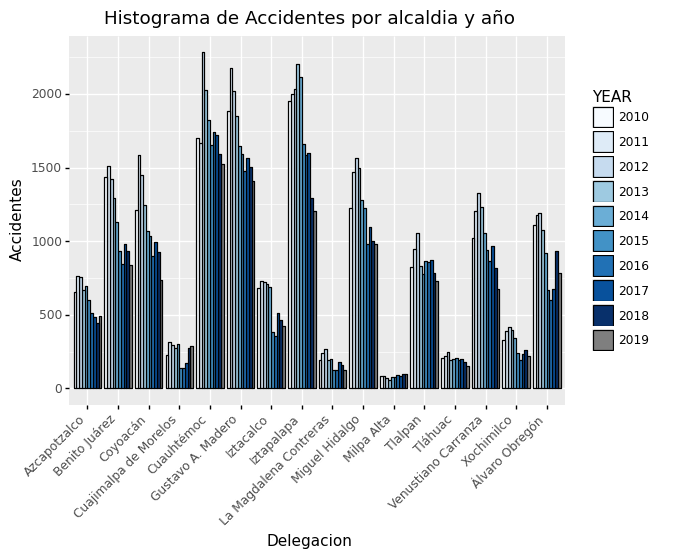

<ggplot: (-9223371901549163737)>

In [30]:
(ggplot(df_cdmx, aes("NOM_MUNICIPIO"))+geom_bar(aes(fill="factor(ANIO)"),position = "dodge",color="black")
+ggtitle("Histograma de Accidentes por alcaldia y año")
 +theme(axis_text_x = element_text(angle=45, hjust=1))
 +scale_fill_brewer(palette=1)
+ylab("Accidentes") +  xlab("Delegacion")
 +labs(fill = "YEAR"))

De manera grafica se puede analizar un poco mejor los daTos y podemos observar las delegaciones con mas accidentes, las cuales son las delegaciones Cuauhtémoc,Iztapalapa y Gustavo A. Madero. Para tener un panorama mas claro podemos hacer otros analis de los datos, por ejemplo realizar un historgrama de los accidentes totales del 2010 al 2019 de acuerdo a la delegacion.

In [31]:
df_cdmx.groupby("NOM_MUNICIPIO").size().sort_values(ascending=False)

NOM_MUNICIPIO
Cuauhtémoc                17723
Iztapalapa                17647
Gustavo A. Madero         17130
Miguel Hidalgo            12319
Benito Juárez             11318
Coyoacán                  11153
Venustiano Carranza       10102
Álvaro Obregón             9134
Tlalpan                    8532
Azcapotzalco               6050
Iztacalco                  5660
Xochimilco                 3014
Cuajimalpa de Morelos      2422
Tláhuac                    1991
La Magdalena Contreras     1796
Milpa Alta                  821
dtype: int64

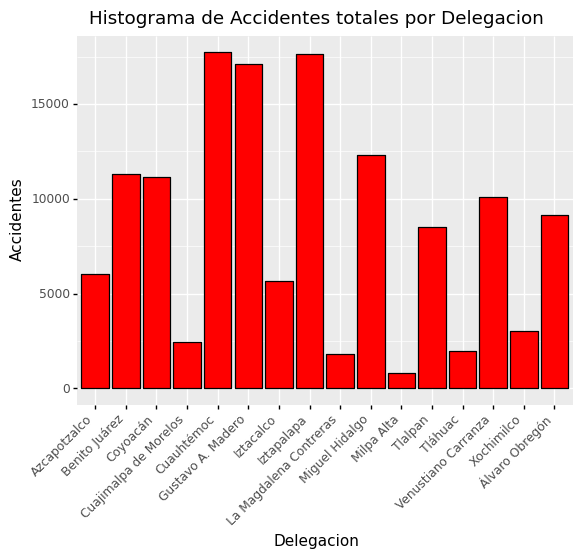

<ggplot: (-9223371901548235825)>

In [32]:
( ggplot(df_cdmx) + 
  aes(x = "NOM_MUNICIPIO") + geom_bar(color= "black", fill = "red", stat = "count")+
  ggtitle("Histograma de Accidentes totales por Delegacion") +
  ylab("Accidentes") +
  xlab("Delegacion")+theme(axis_text_x = element_text(angle=45, hjust=1))
)

De acuerdo a lo obtenido podemos comprobar las delegaciones con mas accidentes, en especial la delegacion Cuauhtemoc la cual registra los mayores accidentes. Seguido de ella se encuentra la delegación de Iztapalapa y Gustavo A. Madero. Por su parte las delegaciones de Cuajimalpa de Morelos,  La Magdalena Contreras y Milpa Alta son las delegaciones con menos choques.

Tras realizar esta gráfica, concluimos que sería interesante también comparar la cantidad de vehiculos y población por delegación, con el fin de ahondar en el análisis.

**¿Cual es el promedio de accidentes por delegacion del año 2010 a 2019?**

Seria Interesante saber los accidentes promedio de acuerdo a cada delegacion, por lo cual realizaremos lo siguiente mediante la funcion groupby

In [33]:
#delagacion_accidentes=delagacion_accidentes.reset_index(name="Num_Acc")
#delagacion_accidentes["Num_Acc"]=(delagacion_accidentes["Num_Acc"]-delagacion_accidentes["Num_Acc"].min())/(delagacion_accidentes["Num_Acc"].max()-delagacion_accidentes["Num_Acc"].min())

In [34]:
#(ggplot(delagacion_accidentes, aes(x="NOM_MUNICIPIO",y="Num_Acc"))
# +geom_col(aes(fill="factor(ANIO)"),position = "dodge",color="black")
#)

In [35]:
#delagacion_accidentes.groupby("NOM_MUNICIPIO").mean().sort_values(ascending=False)
df_cdmx.groupby("NOM_MUNICIPIO")["ANIO"].value_counts()

NOM_MUNICIPIO   ANIO
Azcapotzalco    2011    760
                2012    754
                2014    692
                2013    668
                2010    651
                       ... 
Álvaro Obregón  2014    918
                2019    786
                2017    678
                2015    669
                2016    598
Name: ANIO, Length: 160, dtype: int64

Como podemos ver el Promedio de accidentes de las delegaciones Cuauhtémoc,Iztapalapa y Gustavo A. Madero son las que tienen mayores promedios

**¿Cuales son las tres delegaciones con mas accidentes y como es su tendencia?**

Como lo hemos visto en las secciones previas, las delegaciones Cuauhtémoc,Iztapalapa y Gustavo A. Madero son las que registran mas accidentes. Ahora nos gustaria saber como es su tendencia a lo largo del periodo 2010 al 2019.
Primero empezaremos ultizando el dataset creado en las secciones anteriores

In [36]:
delagacion_accidentes=delagacion_accidentes.loc[["Cuauhtémoc","Iztapalapa","Gustavo A. Madero"]]

In [37]:
delagacion_accidentes=delagacion_accidentes.reset_index(name="Num_Acc")
delagacion_accidentes

,NOM_MUNICIPIO,ANIO,Num_Acc
0,Cuauhtémoc,2010,1701
1,Cuauhtémoc,2011,1669
2,Cuauhtémoc,2012,2283
3,Cuauhtémoc,2013,2025
4,Cuauhtémoc,2014,1820
5,Cuauhtémoc,2015,1652
6,Cuauhtémoc,2016,1740
7,Cuauhtémoc,2017,1719
8,Cuauhtémoc,2018,1590
9,Cuauhtémoc,2019,1524


De manera grafica podriamos observar los resultados obtenidos y con el fin de facilitar la visualización de las tendencias se realizo un gráfico referente a ellos.

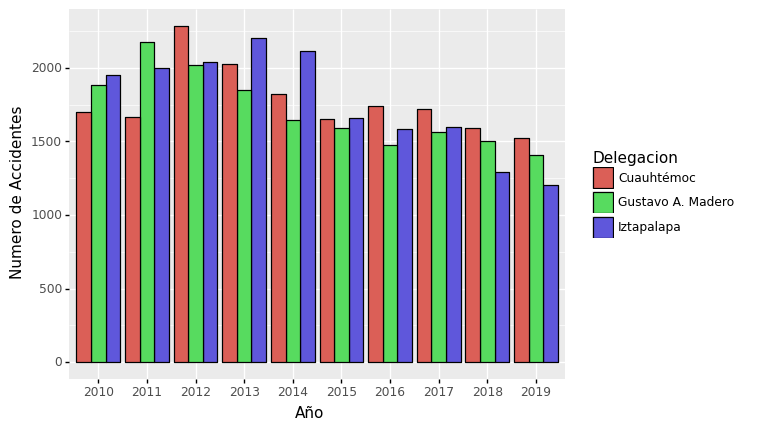

<ggplot: (135306093418)>

In [38]:
(ggplot(delagacion_accidentes, aes(x="factor(ANIO)",y="Num_Acc"))
 +geom_col(aes(fill="NOM_MUNICIPIO"),position = "dodge",color="black")
 +ylab("Numero de Accidentes") +  xlab("Año")+labs(fill = "Delegacion")
)

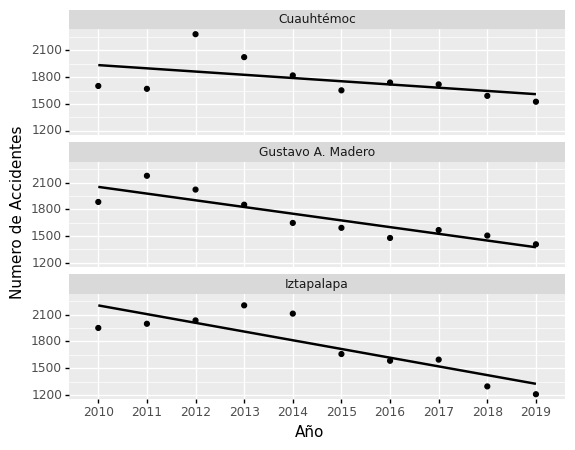

<ggplot: (-9223371901548682478)>

In [39]:
(ggplot(delagacion_accidentes, aes(x="factor(ANIO)",y="Num_Acc", group = 1))
 +geom_point()+geom_smooth(method='lm',span=.2, se=False)+facet_wrap("NOM_MUNICIPIO",ncol=1)
 +ylab("Numero de Accidentes") +  xlab("Año")
)

Como podemos observar las tendencias para las tres delegaciones es a la baja, por lo cual podriamos suponer que los accidentes en estas 3 delegaciones disminuiran en los proximos años. Durante los años 2012, y 2013 podemos observar que alcanzaron valores cercanos a los 2000 accidentes y en el 2019 únicamente la delegación Cuauhtémoc supero los 1500 accidentes.

**¿En que año se han registrado mas accidentes en la CDMX y cual es su tendencia?**

In [40]:
años_accidentes=df_cdmx.groupby("ANIO").size()
años_accidentes.sort_values(ascending=False)

ANIO
2012    17120
2011    16466
2013    15742
2010    14729
2014    14319
2015    12337
2017    12321
2018    11656
2016    11449
2019    10673
dtype: int64

Como podemos observar el año en el cual se registraron mas accidentes fue el 2012, sin embargo seria interesante ver las tendencias que tienen los accidentes, para esto haremos la siguiente grafica

In [41]:
años_accidentes=años_accidentes.reset_index(name="Num_Acc")
años_accidentes

,ANIO,Num_Acc
0,2010,14729
1,2011,16466
2,2012,17120
3,2013,15742
4,2014,14319
5,2015,12337
6,2016,11449
7,2017,12321
8,2018,11656
9,2019,10673


In [42]:
años_accidentes.corr(method="pearson")

,ANIO,Num_Acc
ANIO,1.000000,-0.874329
Num_Acc,-0.874329,1.000000


Para este caso específico se decidió analizar con el coeficiente de Pearson la relación entres los años y el número de accidentes registrados. Este podría ser un análisis preeliminar sobre la tendencia en el número de choques por año; de acuerdo al valor obtenido -0.87 podemos decir de primera instancia que a medida que aumenten los años, la cantidad de accidentes irán a la baja, sin embargo sería muy arriesgado sacar conclusiones a partir de este único indicador, por lo que en análisis posteriores, se complementará con el cooeficiente de spearman, la ecuación del gráfico y/o análisis más robustos como series de tiempos. 

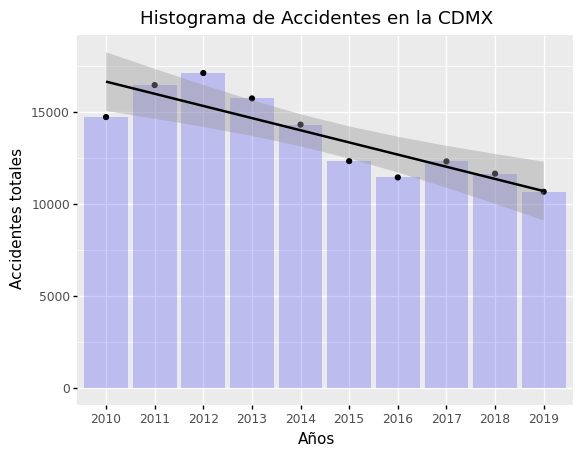

<ggplot: (-9223371901547803893)>

In [43]:
(
  ggplot(años_accidentes) + 
  aes(x="factor(ANIO)",y="Num_Acc", group = 1) + geom_col(alpha= 0.2, fill = "blue")+
  ggtitle("Histograma de Accidentes en la CDMX") +geom_point()+geom_smooth(method='lm',span=.2)+
  ylab("Accidentes totales") +
  xlab("Años")
)

Similar a lo observado en la tendecia de las gráficas de las delegaciones con mayor cantidad de accidentes registrados y en concordancia con la relación del coeficiente de Pearson, se observa en los datos que la tendencia de los accidentes en la CDMX tiene una tendencia a disminuir, esto se debera validar posteriormente con modelos de predicción en futuros análisis

**¿Quiénes son mas propensos a sufrir accidentes, los hombres o las mujeres y como es la tendencia?**

Seria interesante analizar quienes son mas propensos a sufrir accidentes, para esto empezaremos analizando la cantidad de accidentes dependiendo del sexo.

In [44]:
df_cdmx.groupby('SEXO').size()#.map(lambda x:x*100/df_cdmx["ID_EDAD"].count()).loc[[0,99]]

SEXO
Hombre     103402
Mujer       14420
Se fugó     18990
dtype: int64

A simple vista se puede observar que la mayoria de accidentes son causados por hombre. De igual forma, existe una gran cantidad de accidentes en los cuales el conducto se da a la fuga, Incluso superando los registros de mujeres involucradas en accidentes. Podriamos calcular el porcentaje de cada una de estas categorias para poder analizar mejor los datos.

In [45]:
df_cdmx.groupby('SEXO').size().apply(lambda x:x*100/df_cdmx["SEXO"].count())

SEXO
Hombre     75.579628
Mujer      10.540011
Se fugó    13.880361
dtype: float64

Tal como lo habias observado el porcentaje de Mujeres involucradas en un accidente es mucho menor al de hombres, al igual que el de conductores que se dieron a la fuga. El siguiente paso es analizar las tendencias de accidentes tanto para hombres como mujeres, para saber si van a la baja o la alta.

In [46]:
filtro_sexo_accidentes=df_cdmx.groupby("SEXO")["ANIO"].value_counts().loc[["Hombre","Mujer"]]
filtro_sexo_accidentes=filtro_sexo_accidentes.reset_index(name="Num_Acc")


In [47]:
filtro_sexo_accidentes

,SEXO,ANIO,Num_Acc
0,Hombre,2012,13158
1,Hombre,2011,12228
2,Hombre,2013,11776
3,Hombre,2010,11518
4,Hombre,2014,10691
5,Hombre,2015,9546
6,Hombre,2017,9375
7,Hombre,2016,8829
8,Hombre,2018,8546
9,Hombre,2019,7735


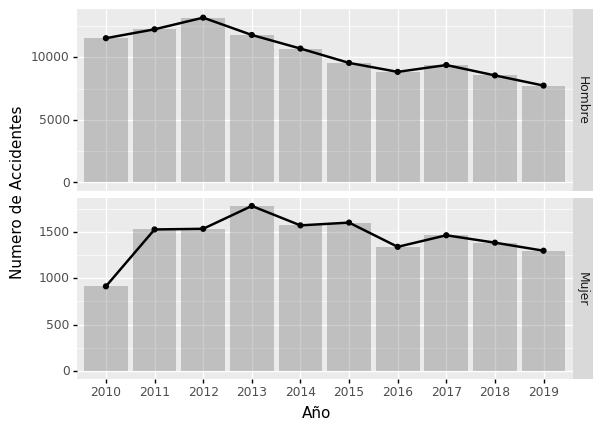

<ggplot: (135306866026)>

In [48]:
(ggplot(filtro_sexo_accidentes, aes(x="factor(ANIO)",y="Num_Acc",group = 1))
 +geom_col(alpha = 0.3)+facet_grid('SEXO ~ .',scales="free")+geom_point()+geom_smooth(span=.2,se=False)
 +ylab("Numero de Accidentes") +  xlab("Año")
)

Adicionalmente podemos analizar el caso de las personas que se fugaron y su tendencia.

In [49]:
filtro_fuga_accidentes=df_cdmx.groupby("SEXO")["ANIO"].value_counts().loc["Se fugó"]
filtro_fuga_accidentes=filtro_fuga_accidentes.reset_index(name="Num_Acc")

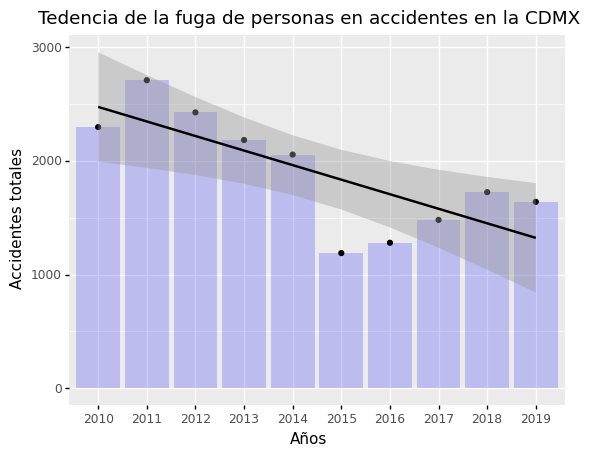

<ggplot: (-9223371901547775940)>

In [50]:
(
  ggplot(filtro_fuga_accidentes) + 
  aes(x="factor(ANIO)",y="Num_Acc", group = 1) + geom_col(alpha= 0.2, fill = "blue")+
  ggtitle("Tedencia de la fuga de personas en accidentes en la CDMX") +geom_point()+geom_smooth(method='lm',span=.2)+
  ylab("Accidentes totales") +
  xlab("Años")
)

De acuerdo a los graficos podemos observar una tendencia clara de disminucion de accidentes en el caso de hombres. En el caso de las mujeres la tendencia no es tan clara ya que hubo un aumento considerable de accidentes en el 2013, y en años posteriores la tendencia fue ligeramente a la baja. Por lo anterior podriamos suponer unas tendencias a la baja de los dos sexos en cuanto a los accidentes.

En cuanto a la tendencia de las personas a fugarse de los accidentes, los datos indican en general una tendencia de dismonucion. Sin embargo en los ultimos años el numero de personas que se fugan de los accidentes ha comnezado a aumentar ligeramente. Pero en general podriamos suponer que va a la baja.

**¿Cuáles son los meses con mayores accidentes a los largo de los años?**

Se realizó un análisis respecto a los meses con mayor número de accidentes a lo largo de los 10 años observados.

Para empezar de agruparon los datos del dataframe original por año y mes, posteriomente se concatenaron en un nuevo dataframe con únicamente los máximos de accidentes de todos los años, y se modificaron los meses para una mayor comprensión de los datos.

In [51]:
df_anios = df_cdmx.groupby(['ANIO','MES']).size()
print(df_anios)
df_maximos_anios = pd.DataFrame()
for anio in range(df_cdmx['ANIO'].unique().max(),df_cdmx['ANIO'].unique().min()-1,-1):
    df_maximos_anios = pd.concat([df_maximos_anios,df_anios[anio][df_anios[anio] == df_anios[anio].max()]])

df_maximos_anios['MES'] = df_maximos_anios.index

int_a_mes = {1 :'Enero',2 :'Febrero',3 : 'Marzo',4 : 'Abril', 5 : 'Mayo', 6 : 'Junio',
            7 : 'Julio', 8 : 'Agosto', 9 : 'Septiembre',10 : 'Octubre', 11 : 'Noviembre', 12 : 'Diciembre'}
df_maximos_anios['MES'] = df_maximos_anios['MES'].map(int_a_mes)

ANIO  MES
2010  1      1039
      2      1034
      3      1246
      4      1093
      5      1249
             ... 
2019  8       943
      9       953
      10     1027
      11      939
      12      915
Length: 120, dtype: int64


In [52]:
df_maximos_anios.set_index(df_cdmx['ANIO'].unique(),inplace=True)
df_maximos_anios.rename(columns={0 : 'Max_acci'},inplace=True)
df_maximos_anios.index.name = 'ANIO'

df_maximos_anios

,Max_acci,MES
ANIO,,
2019,1027.0,Octubre
2018,1160.0,Agosto
2017,1249.0,Agosto
2016,1089.0,Septiembre
2015,1135.0,Junio
2014,1311.0,Octubre
2013,1426.0,Octubre
2012,1510.0,Octubre
2011,1679.0,Octubre


En el código aqui presente se obtuvieron los meses con mayor número de accidentes en los 10 años y se observó que el mes con más accidentes fue Obtubre en 6 años del total observado, seguido por Agosto, Septiembre y Junio respectivamente.

In [53]:
df_maximos_anios.groupby('MES').size().sort_values(ascending=False)

MES
Octubre       6
Agosto        2
Septiembre    1
Junio         1
dtype: int64

Se grafican los datos de los accidentes contra los meses segun los años observados para comprobar los resultados arrojados en el proceso anterior.

C:\Users\Sergio\Anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Greens has a maximum of 9 colors Returning the palette you asked for with that many colors
C:\Users\Sergio\Anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Greens has a maximum of 9 colors Returning the palette you asked for with that many colors


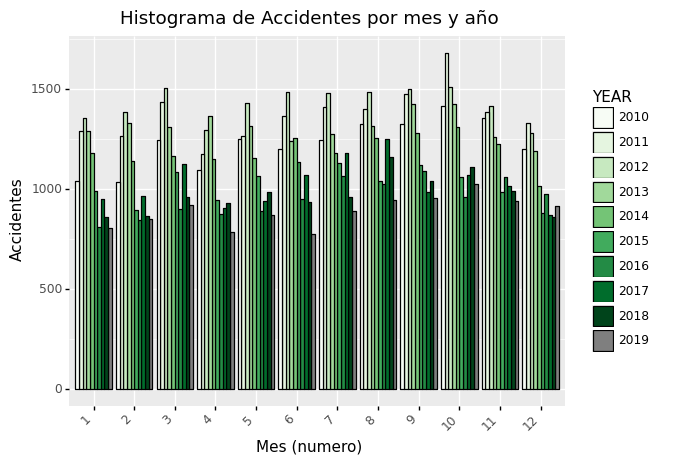

<ggplot: (-9223371901547802645)>

In [54]:
(
  ggplot(df_cdmx) + 
  aes(x = "factor(MES)") + geom_bar(aes(fill = "factor(ANIO)"),position = "dodge",color="black")+
  ggtitle("Histograma de Accidentes por mes y año")
    +  ylab("Accidentes") 
    + xlab("Mes (numero)")+theme(axis_text_x = element_text(angle=45, hjust=1))+scale_fill_brewer(palette=5)
    +labs(fill = "YEAR")
)

**¿Cuáles son los dias de la semana con mayores accidentes a los largo de los años?**

Se realizó un analisis respecto a los dias con mayor número de accidentes a lo largo de los 10 años observados.

In [55]:
df_cdmx["FECHA_DIA"]=df_cdmx["FECHA"].dt.weekday

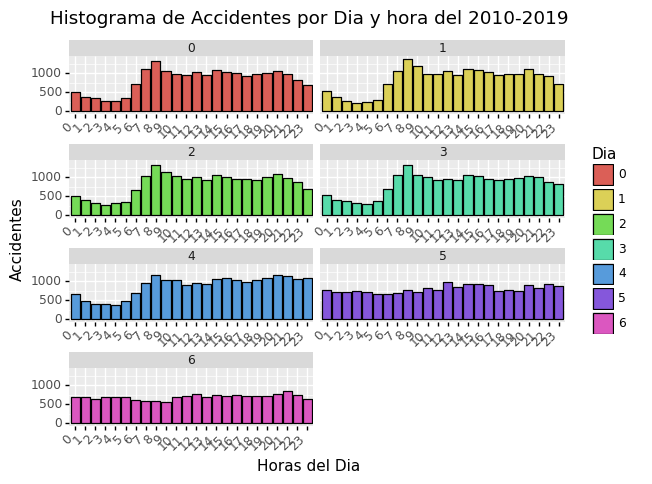

<ggplot: (-9223371901547768590)>

In [56]:
#The day of the week with Monday=0, Sunday=6.

(
  ggplot(df_cdmx) + 
  aes(x = "factor(ID_HORA)") + geom_bar(aes(fill = "factor(FECHA_DIA)"),position = "dodge",color="black")+
  ggtitle("Histograma de Accidentes por Dia y hora del 2010-2019") +
  ylab("Accidentes") +
  xlab("Horas del Dia")+labs(fill = "Dia")+facet_wrap("FECHA_DIA",ncol=2,scales = "free_x")
 + theme(subplots_adjust={'hspace': 0.8})+theme(axis_text_x = element_text(angle=45, hjust=1))

)

En esta gráfica observamos la cantidad de accidentes a lo largo del día y evaluado por día de la semana. El Lunes es nuestro día 0 y el Domingo el día 6. Podemos observar que la cantidad de accidentes se comporta de manera ascendente conforme transcurre el día con excepción de horas del día específicos como 9 de la mañana. El Viernes podemos ver valores más altos y mantenidos, sin embargo Míercoles y Jueves destacan por tener los valores más altos registrados.

Con los resultados de las gráficas anteriores se procedió a agrupar los datos del dataframe original por año y dia, posteriomente se concatenaron en un nuevo dataframe con únicamente los máximos de accidentes de todos los años.

In [57]:
df_anios_dias = df_cdmx.groupby(['ANIO','DIASEMANA']).size()

In [58]:
df_maximos_anios_dias = pd.DataFrame()
for anio in range(df_cdmx['ANIO'].unique().max(),df_cdmx['ANIO'].unique().min()-1,-1):
    df_maximos_anios_dias = pd.concat([df_maximos_anios_dias,df_anios_dias[anio][df_anios_dias[anio] == df_anios_dias[anio].max()]])

In [59]:
df_maximos_anios_dias

,0
Viernes,1612.0
Viernes,1807.0
Viernes,1909.0
Viernes,1740.0
Jueves,1939.0
Viernes,2292.0
Viernes,2571.0
Viernes,2620.0
Viernes,2523.0
Viernes,2265.0


A primera vista, se observa que a lo largo de los años observados el dia viernes destaca como el dia donde hay mayores accidentes en cada una de las observaciones.

In [60]:
df_maximos_anios_dias['DIAS'] = df_maximos_anios_dias.index
df_maximos_anios_dias.set_index(df_cdmx['ANIO'].unique(),inplace=True)
df_maximos_anios_dias.rename(columns={0 : 'Max_acci'},inplace=True)
df_maximos_anios_dias.index.name = 'ANIO'

df_maximos_anios_dias

,Max_acci,DIAS
ANIO,,
2019,1612.0,Viernes
2018,1807.0,Viernes
2017,1909.0,Viernes
2016,1740.0,Viernes
2015,1939.0,Jueves
2014,2292.0,Viernes
2013,2571.0,Viernes
2012,2620.0,Viernes
2011,2523.0,Viernes


Una vez con los datos acomodados correctamente se procedió a obtener la cantidad de años en donde cada día tuvo el máximo de accidentes, siendo el dia viernes con mayor número de accidentes ya que en 9 años del total observado este dia destaca con mayores accidentes, seguido por el dia jueves.

In [61]:
df_maximos_anios_dias.groupby('DIAS').size().sort_values(ascending=False)

DIAS
Viernes    9
Jueves     1
dtype: int64

**¿Cual es la edad mas propensa a sufrir accidentes?**

Para responder esta pregunta, primero tenemos que contabilizar el numero de accidentes en base a la edad, del año 2010 al 2019, depues ordenaremos los datos de manera descendiente para poder analizar las edades con mas accidentes

In [62]:
df_cdmx.groupby("ID_EDAD")["ID_EDAD"].count().sort_values(ascending=False)

ID_EDAD
99    26480
0     18990
30     3693
40     3340
28     3000
      ...  
89        3
13        3
95        2
91        1
94        1
Name: ID_EDAD, Length: 83, dtype: int64

De manera grafica podemos verlo de la siguiente manera

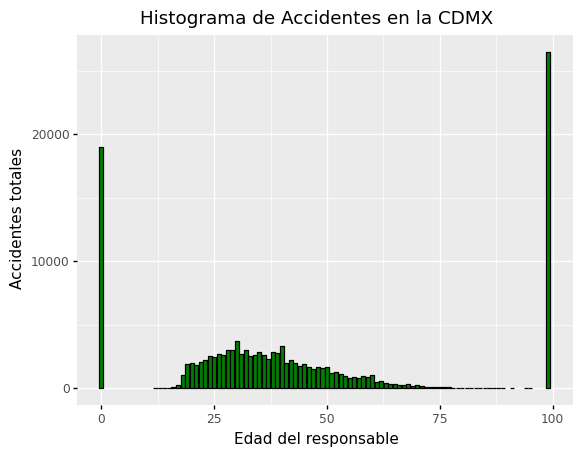

<ggplot: (-9223371901547803725)>

In [63]:
(
  ggplot(df_cdmx) + 
  aes(x = "ID_EDAD") + geom_bar(color= "black", fill = "green", stat = "count")+
  ggtitle("Histograma de Accidentes en la CDMX") +
  ylab("Accidentes totales") +
  xlab("Edad del responsable")
)

Como podemos observar existe una gran cantidad de datos pertenecientes a la edad de 0 y 99 lo cual no hace sentido, esta gráfica es como se observan los datos sin ninguna manipulación, sin embargo se asume que son datos que no lograron recabarse de manera correcta por lo cuál se decidio abordar la situación de la manera mostrada abajo.

**¿Que porcentaje de datos de edades de 99 y 100 años hay en los datos?**

Apartir de la utima grafica obtenida de numero de accidentes en funcion de la edad se comienza a analizar los datos. Primero se observa que los valores de edad 0 y 99 albergan demasiados datos, de acuerdo a los registros del INEGI cuando el conductor se fugaba, los registros asignan el valor 0 a la edad. En cuanto a 99 significa que se desconoce la edad del conductor.

In [64]:
df_cdmx.groupby('ID_EDAD').size().map(lambda x:x*100/df_cdmx["ID_EDAD"].count()).loc[[0,99]]

ID_EDAD
0     13.880361
99    19.355027
dtype: float64

Como podemos notar el porcentaje de datos pertenecientes a estas dos categorias es arriba del 30% de los datos por lo cual no es muy recomendable eliminar todas las filas pertenecientes a estos datos para futuras predicciones o algoritmos de prediccion. Sin embargo, podriamos analizar un poco los datos de edades excluyedo estas dos categorias

In [65]:
filtro_no_cero=df_cdmx["ID_EDAD"]!=0
filtro_no_noventa=df_cdmx["ID_EDAD"]!=99

In [66]:
df_cdmx_filtrado=df_cdmx[filtro_no_cero & filtro_no_noventa]
df_cdmx_filtrado.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,CLASACC,ESTATUS,NOM_MUNICIPIO,FECHA,FECHA_DIA
0,Municipal,9,2,2019,1,19,59,1,Martes,Accidente en intersección,...,0,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-01 19:59:00,1
3,Municipal,9,2,2019,1,15,55,5,Sabado,Accidente en intersección,...,0,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-05 15:55:00,5
4,Municipal,9,2,2019,1,14,30,9,Miercoles,Accidente en intersección,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-09 14:30:00,2
6,Municipal,9,2,2019,1,9,0,11,Viernes,Accidente en intersección,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-11 09:00:00,4
8,Municipal,9,2,2019,1,16,3,11,Viernes,Accidente en intersección,...,1,0,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-11 16:03:00,4


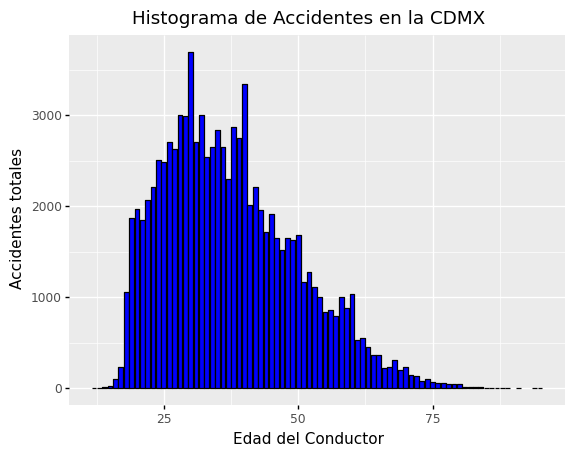

<ggplot: (-9223371901547550362)>

In [67]:
(
  ggplot(df_cdmx_filtrado) + 
  aes(x = "ID_EDAD") + geom_bar(color= "black", fill = "blue", stat = "count")+
  ggtitle("Histograma de Accidentes en la CDMX") +
  ylab("Accidentes totales") +
    xlab("Edad del Conductor")
)

Filtrando los datos, podemos observar un mejor comportamiento en la grafica, de igual forma podemos determinar la edad que ha sufrido mas accidentes (moda) y el promedio de edad 

In [68]:
#df_cdmx_filtrado.groupby("ID_EDAD")["ID_EDAD"].count().loc[]
#Promedio de edad
df_cdmx_filtrado["ID_EDAD"].mean()

37.4163254581682

In [69]:
#Edad con mas Accidentes
df_cdmx_filtrado["ID_EDAD"].mode()

0    30
dtype: int64

In [70]:
#top 5 edades
df_cdmx_filtrado.groupby("ID_EDAD")["ID_EDAD"].count().sort_values(ascending=False).head(5)

ID_EDAD
30    3693
40    3340
28    3000
32    2998
29    2989
Name: ID_EDAD, dtype: int64

De acuerdo a los registros 30 años es la edad que tiene mas accidentes acumulados del 2010 al 2019, de igual forma podemos ver el top 5 de edades con mas accidentes acumulados siendo todas edades arriba de los 27 años.

De nuevo y en un posible anaálsis futuro sería recomendable evaluar la cantidad de accidentes por edad y la cantidad de población de esa edad que transita. Esto con el fin de eliminar sesgos, similar a lo que ocurre en el sexo. 

**¿Cual es la Tedencia de las edades mas propensas a sufrir accidentes del 2010 al 2019?**

Para esto analizaremos las 3 edades con mas registros de accidentes y veremos como han variado a lo largo de los años
* Para la edad de 30

In [71]:
Tendencia_años=df_cdmx_filtrado.groupby('ID_EDAD')['ANIO'].value_counts()

In [72]:
Tendencia_30_años=Tendencia_años.loc[30].sort_index(ascending=True)
Tendencia_30_años

ANIO
2010    270
2011    268
2012    240
2013    503
2014    453
2015    395
2016    401
2017    422
2018    349
2019    392
Name: ANIO, dtype: int64

<AxesSubplot:xlabel='ANIO'>

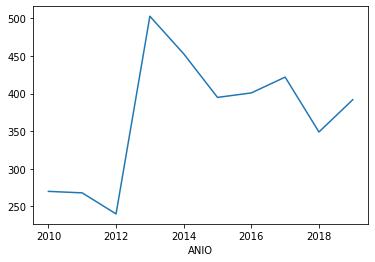

In [73]:
Tendencia_30_años.plot()

In [74]:
T_30=Tendencia_30_años.to_frame()#.reset_index(level='ANIO',col_level=1, col_fill='genus')
T_30.columns = ['NUM_ACC']
T_30.reset_index(inplace=True)
T_30.corr(method="pearson")

,ANIO,NUM_ACC
ANIO,1.00000,0.46989
NUM_ACC,0.46989,1.00000


Como se puede obsevar en la gráfica el comportamiento es un poco irregular. Definitavamente requerirá se lleve a cabo un análisis mucho más completo. Nuestro análisis preeliminar utilizando coeficiente de Pearson, tampoco nos permite ver alguna relación directa o indirecta significativa. Un ajuste polinomial de grado 5 probablemente podrá ajustarse a esta gráfica, aunque sería bueno poder realizar algun estudio con serie de tiempo para obtener resultados mas precisos.

* Para la edad de 40

In [75]:
Tendencia_40_años=Tendencia_años.loc[40].sort_index(ascending=True)
Tendencia_40_años

ANIO
2010    267
2011    264
2012    225
2013    492
2014    454
2015    356
2016    337
2017    349
2018    330
2019    266
Name: ANIO, dtype: int64

<AxesSubplot:xlabel='ANIO'>

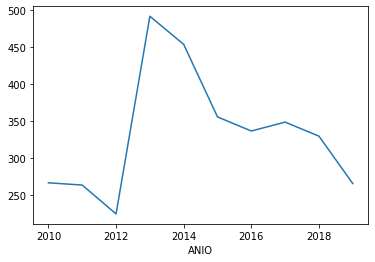

In [76]:
Tendencia_40_años.plot()

Observamos en esta gráfica, que la tendencia de este grupo de edad va a la baja de acuerdo a los datos obtenidos en el 2019, al igual que los grupos de años anteriores en el 2013 fue cuando se obtuvo el valor máximo registrado de número de accidentes. Sin emabrgo, el coeficiente de Pearson es positivo pero al ser tan cercano a cero indica una correlación casi nula que es lógica, dado que pese a que son pocos datos hay mucha variación entre los años.

In [77]:
T_40=Tendencia_40_años.to_frame()#.reset_index(level='ANIO',col_level=1, col_fill='genus')
T_40.columns = ['NUM_ACC']
T_40.reset_index(inplace=True)
T_40.corr(method="pearson")

,ANIO,NUM_ACC
ANIO,1.000000,0.109287
NUM_ACC,0.109287,1.000000


* Para la edad de 28 años

In [78]:
Tendencia_28_años=Tendencia_años.loc[28].sort_index(ascending=True)
Tendencia_28_años

ANIO
2010    179
2011    140
2012    196
2013    483
2014    407
2015    330
2016    312
2017    353
2018    305
2019    295
Name: ANIO, dtype: int64

<AxesSubplot:xlabel='ANIO'>

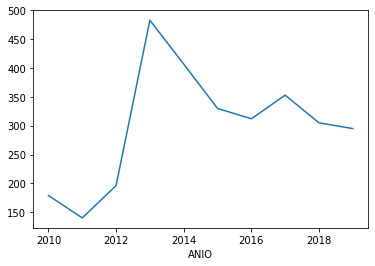

In [79]:
Tendencia_28_años.plot()

In [80]:
T_28=Tendencia_28_años.to_frame()#.reset_index(level='ANIO',col_level=1, col_fill='genus')
T_28.columns = ['NUM_ACC']
T_28.reset_index(inplace=True)
T_28.corr(method="pearson")

,ANIO,NUM_ACC
ANIO,1.000000,0.416955
NUM_ACC,0.416955,1.000000


Observamos un comportamiento similar a las anteriores en los primeros años de la gráfica, con una tendencia a la baja en el último año, pero un 2017 en compración con los registros de los demás años, de nuevo es difícil genera una interpretación o predicción con el gráfico y el coeficiente de Pearson, definitavamente el análisis inferencial será de gran utilidad para poder dar una predicción más certera del comportamiento de este tipo de siniestro en los años venideros.

En base a los resultados obtenidos podemos obervar que para las edades de 40 y 28 años las tendencias parecen ir a la baja lo que nos podria indicar una reduccion en los accidentes a esta edad. En cambio para la edad con mas registros de accidentes que es 30 años, la tendencia parece indicar que seguira siendo la edad con mas accidentes.

**¿Que vehiculo es el que causa mas accidentes?**

Como se observo cuando se estaba analizando el Dataset, cada tipo de vehiculo tiene su propia columna por lo cual es necesario tranformar estas columnas en filas para poder realizar algunas agregaciones y calculos.
Para realizar esto, primero necesitamos elegir mas columnas que queremos trasnformar, las cuales se almacenaran en `modelo_columnas`.

In [81]:
modelo_columnas=["AUTOMOVIL","CAMPASAJ","MICROBUS","PASCAMION","OMNIBUS","TRANVIA",
                 "CAMIONETA","CAMION","TRACTOR","FERROCARRI","MOTOCICLET","BICICLETA","OTROVEHIC"]
columnas_filtradas=[i for i in list(df_cdmx.columns) if i not in modelo_columnas]


In [82]:
df_tipo_vehiculo=df_cdmx.melt(id_vars=columnas_filtradas,var_name ='TIPO_VEHICULO', value_name ='NUM_ACC')
df_tipo_vehiculo.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,CICLHERIDO,OTROMUERTO,OTROHERIDO,CLASACC,ESTATUS,NOM_MUNICIPIO,FECHA,FECHA_DIA,TIPO_VEHICULO,NUM_ACC
0,Municipal,9,2,2019,1,19,59,1,Martes,Accidente en intersección,...,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-01 19:59:00,1,AUTOMOVIL,1
1,Municipal,9,2,2019,1,3,37,5,Sabado,Accidente en intersección,...,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-05 03:37:00,5,AUTOMOVIL,2
2,Municipal,9,2,2019,1,14,23,5,Sabado,Accidente en intersección,...,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-05 14:23:00,5,AUTOMOVIL,1
3,Municipal,9,2,2019,1,15,55,5,Sabado,Accidente en intersección,...,0,0,0,No fatal,Cifras Definitivas,Azcapotzalco,2019-01-05 15:55:00,5,AUTOMOVIL,1
4,Municipal,9,2,2019,1,14,30,9,Miercoles,Accidente en intersección,...,0,0,0,Sólo daños,Cifras Definitivas,Azcapotzalco,2019-01-09 14:30:00,2,AUTOMOVIL,2


In [83]:
df_vehiculo_agg=df_tipo_vehiculo.groupby(["ANIO","TIPO_VEHICULO"])["NUM_ACC"].sum()
df_vehiculo_agg

ANIO  TIPO_VEHICULO
2010  AUTOMOVIL        22648
      BICICLETA          152
      CAMION             356
      CAMIONETA         1215
      CAMPASAJ           883
                       ...  
2019  OMNIBUS             12
      OTROVEHIC           55
      PASCAMION          751
      TRACTOR            181
      TRANVIA             29
Name: NUM_ACC, Length: 130, dtype: int64

Arreglando la serie para convertirla en un data frame, podemos graficarlo para poder visulaizar los resultados

In [84]:
df_vehiculo_agg=df_vehiculo_agg.to_frame().reset_index()
df_vehiculo_agg

,ANIO,TIPO_VEHICULO,NUM_ACC
0,2010,AUTOMOVIL,22648
1,2010,BICICLETA,152
2,2010,CAMION,356
3,2010,CAMIONETA,1215
4,2010,CAMPASAJ,883
...,...,...,...
125,2019,OMNIBUS,12
126,2019,OTROVEHIC,55
127,2019,PASCAMION,751
128,2019,TRACTOR,181


In [85]:
#df_tipo_vehiculo["FECHA"].dt.year

In [86]:
#df_vehiculo_agg["NUM_ACC"]=(df_vehiculo_agg["NUM_ACC"]-df_vehiculo_agg["NUM_ACC"].min())/(df_vehiculo_agg["NUM_ACC"].max()-df_vehiculo_agg["NUM_ACC"].min())
#df_vehiculo_agg

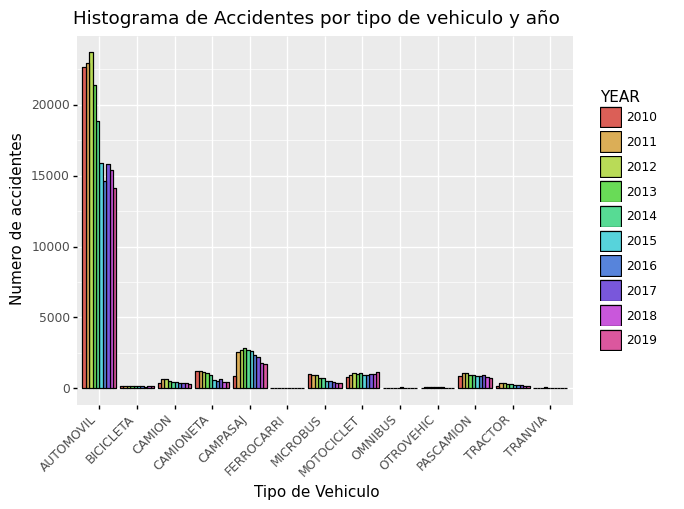

<ggplot: (-9223371901548277767)>

In [87]:
(ggplot(df_vehiculo_agg, aes("factor(TIPO_VEHICULO)","NUM_ACC"))
 +geom_col(aes(fill="factor(ANIO)"),position = "dodge",color="black")
 +theme(axis_text_x = element_text(angle=45, hjust=1))+ ggtitle("Histograma de Accidentes por tipo de vehiculo y año") +
  xlab("Tipo de Vehiculo") +labs(fill = "YEAR")+ylab("Numero de accidentes")
)

En el grafico y analisis de datos podemos observar como, los accidentes de autos son los mas comunes. Lo cual es algo que ya esperabamos, ya que existen muchos mas automoviles en circulacion que los otros tipos de vehiculos.

In [88]:
df_vehiculo_agg.groupby("TIPO_VEHICULO")["NUM_ACC"].sum().sort_values(ascending=False)

TIPO_VEHICULO
AUTOMOVIL     185484
CAMPASAJ       22476
MOTOCICLET      9885
PASCAMION       9229
CAMIONETA       8378
MICROBUS        6668
CAMION          4691
TRACTOR         2731
BICICLETA       1488
OTROVEHIC        720
TRANVIA          462
OMNIBUS          247
FERROCARRI         5
Name: NUM_ACC, dtype: int64

Tambien calculando el acumulado de los accidentes, podemos determinar los vehiculos que mas accidentes generaron en este caso el top 3 de tios de vehiculos que causaron mas accidentes son Automovil, Camioneta de pasajeros y Motocicletas

**¿Cual es la tendencia de los 6 tipos de vehiculos que causan mas accidentes?**

Una vez que tenemos claro los tipos de vehiculos que causan mas accidentes, seria interesante observar si existe una tendencia en los tipos de vehiculos con mas accidentes y si esta es al aumento o disminucion

Primero empezaremos filtrando los 3 tipos de vehiculos con mas accidentes los cuales son Automovil(`AUTOMOVIL`), Camioneta de pasajeros (`CAMPASAJ`) y Motocicletas (`MOTOCICLET`)

In [89]:
filtro_top=df_vehiculo_agg.query('TIPO_VEHICULO=="AUTOMOVIL" or TIPO_VEHICULO=="CAMPASAJ" or TIPO_VEHICULO=="MOTOCICLET"')


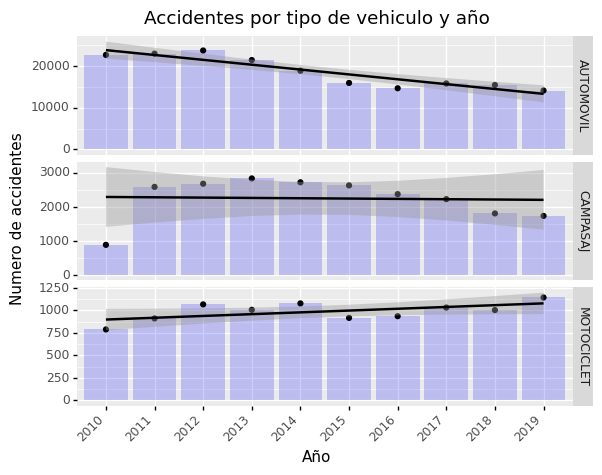

<ggplot: (135306264987)>

In [90]:
(ggplot(filtro_top, aes("factor(ANIO)","NUM_ACC",group=1))
 +geom_col(alpha= 0.2, fill = "blue")
 +geom_point()+geom_smooth(method='lm',span=.2)
 +facet_grid("TIPO_VEHICULO~ .",scales = 'free')
 +theme(axis_text_x = element_text(angle=45, hjust=1))+ ggtitle("Accidentes por tipo de vehiculo y año") +
  xlab("Año") +labs(fill = "YEAR")+ylab("Numero de accidentes")
)

A diferencia de la tendencia del camión de pasajeros y de los automóviles que presentan ambos una tendecia a la baja, las motocicletas tienen una ligera tendencia a la alta, especialmente en el año 2019.

De nuevo será útil valorar y analizar estas tendencias con la cantidad de parque vehicular relativo de cada tipo de vehículo.

Para analizar los 3 vehiculos pertenecistes al top 6 se realizar lo siguiente:

In [91]:
filtro_top=df_vehiculo_agg.query('TIPO_VEHICULO=="PASCAMION" or TIPO_VEHICULO=="CAMIONETA" or TIPO_VEHICULO=="MICROBUS"')

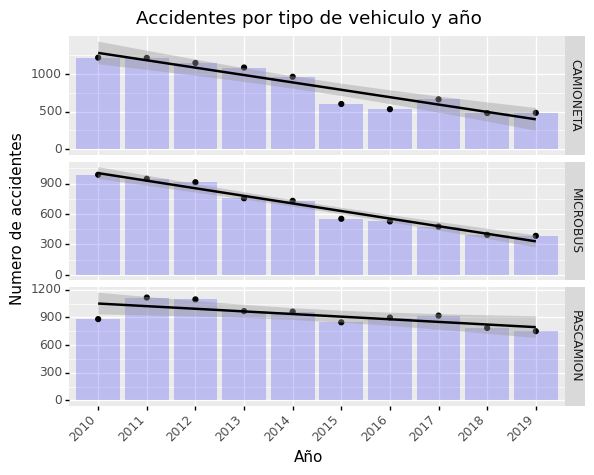

<ggplot: (135307283411)>

In [92]:
(ggplot(filtro_top, aes("factor(ANIO)","NUM_ACC",group=1))
 +geom_col(alpha= 0.2, fill = "blue")
 +geom_point()+geom_smooth(method='lm',span=.2)
 +facet_grid("TIPO_VEHICULO~ .",scales = 'free')
 +theme(axis_text_x = element_text(angle=45, hjust=1))+ ggtitle("Accidentes por tipo de vehiculo y año") +
  xlab("Año") +labs(fill = "YEAR")+ylab("Numero de accidentes")
)

A diferencia del caso anterior, las tres gráficas de los tipos de automóviles presentan una línea de tendencia que va a la baja, para el caso del Microbus es espcialmente marcada esta tendencia, por lo cual podriamos de igual manera analizar que factores pudieron influir para que esto sucediera.

# Conexión API
Se establece la conexión con la api de INEGI, tal conexion solo regresará los datos de accidentes de todos los años en la CDMX

In [93]:
import requests
endpoint = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1006000039/es/07000009/false/BISE/2.0/eac85084-3d8e-6f65-a005-c0570ed1e03e?type=json"
r = requests.get(endpoint)

Se revisa que haya sido exitosa la conexión y se revisa lo devuelto por la api

In [94]:
r.status_code
json = r.json()
json.keys()

dict_keys(['Header', 'Series'])

Se realiza una rapida inspeccion de los datos de proporciona la api

In [95]:
data = json["Series"][0]['OBSERVATIONS']
data

[{'TIME_PERIOD': '1997',
  'OBS_VALUE': '14253.00000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '07000009'},
 {'TIME_PERIOD': '1998',
  'OBS_VALUE': '11820.00000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '07000009'},
 {'TIME_PERIOD': '1999',
  'OBS_VALUE': '10512.00000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '07000009'},
 {'TIME_PERIOD': '2000',
  'OBS_VALUE': '10990.00000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '07000009'},
 {'TIME_PERIOD': '2001',
  'OBS_VALUE': '12844.00000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '07000009'},
 {'TIME_PERIOD': '2002',
  'OBS_VALUE': '14917.00000000000000000000',
  'OBS_EXCEPTION': N

Se normalizan los datos obtenidos y asignan den dataframe

In [96]:
normalized = pd.json_normalize(data)
df_api = pd.DataFrame.from_dict(normalized)

Se obtienen los tipos de datos del dataframe

In [97]:
df_api.dtypes

TIME_PERIOD      object
OBS_VALUE        object
OBS_EXCEPTION    object
OBS_STATUS       object
OBS_SOURCE       object
OBS_NOTE         object
COBER_GEO        object
dtype: object

En vista de que las datos de 'TIME_PERIOD' y 'OBS_VALUE' son tipo object se realizan los cast correspondientes

In [98]:
diccionario_conv = {
    'TIME_PERIOD': int,
    'OBS_VALUE' : float
}

df_api = df_api.astype(diccionario_conv)

#Conversion a int de columna OBS_VALUE
df_api['OBS_VALUE'] = df_api['OBS_VALUE'].astype(int)


Se obtienen nuevamente los tipos de datos y se observa que ya son correctos para su utilización

In [99]:
df_api.dtypes

TIME_PERIOD       int32
OBS_VALUE         int32
OBS_EXCEPTION    object
OBS_STATUS       object
OBS_SOURCE       object
OBS_NOTE         object
COBER_GEO        object
dtype: object

Se Seleccionan unicamente los datos de 2010 en adelante ya que es el periodo a observar, además, solo se selecionan las columnas 'TIME_PERIOD' y 'OBS_VALUE' ya que son las únicas que regresan valores de importancia.

In [100]:
cdmx_2010_2019 = df_api[df_api['TIME_PERIOD']>=2010].reset_index(drop=True)[['TIME_PERIOD','OBS_VALUE']]

Se visualiza el dataframe obtenido

In [101]:
cdmx_2010_2019

,TIME_PERIOD,OBS_VALUE
0,2010,14729
1,2011,16466
2,2012,17120
3,2013,15742
4,2014,14319
5,2015,12337
6,2016,11449
7,2017,12321
8,2018,11656
9,2019,10673


Se grafican los datos obtenidos, sin embargo, en vista de lo restricitiva que es la api del INEGI se optó por el uso de archivos CSV´s que proporciona ya que tales cuentan con datos más completos y proporcionan mayor información respecto a los accidentes en la CDMX a lo largo de los años. 

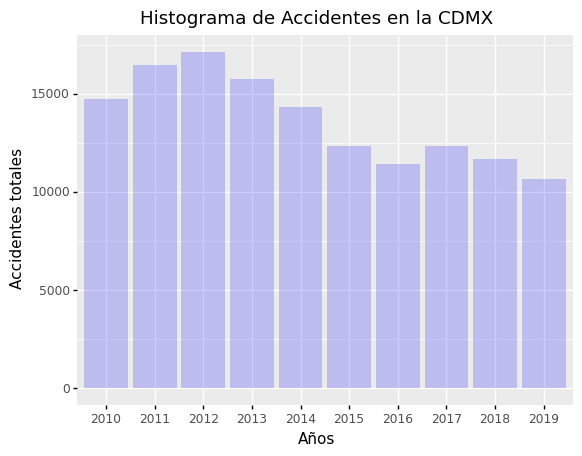

<ggplot: (135306512697)>

In [102]:
(
  ggplot(cdmx_2010_2019) + 
  aes(x="factor(TIME_PERIOD)",y="OBS_VALUE", group = 1) + geom_col(alpha= 0.2, fill = "blue")+
  ggtitle("Histograma de Accidentes en la CDMX") +
  ylab("Accidentes totales") +
  xlab("Años")
)

## Seccion de Conclusiones y Proyección del Análisis Inferencial

Para esta última parte y como se resalto en múltiples comentarios los análisis inferenciales deberán ir enfocados en evaluar 3 aspectos específicos.

El primer rubro será el análisis del impacto de los distintos factores o variables sobre los choques, para esto será necesario llevar a cabo análisis de regresión multivariable en los cuáles se puedan evaluar los coeficientes, así como las interacciones de estos factores. Dentro de las herramientas estadísticas que podremos utilizar para este análisis destacan ANOVA, K - Means, Random Forests, entre otros.

El segundo rubro será ahondar en el análisis comparativo con otros archivos de datos como lo es el parque vehicular, la cantidad de hombres y mujeres registrados, persona registradas por delegación, personas registradas por grupos de edad, entre otros. Los cuáles serán eficacez para eliminar ciertos tipos de sesgo que por ahora se tienen y que impiden un análisis más profundo de los factores determinates para la generación de un choque.

Como último rubro, será importante seguir enfocando hacía la predicción de choques bajo diferentes tipos de escenarios, para eto será útil efectuar métodos como las series de tiempo. asimismo y complementadno lo anterior estas predicciones podrán ayudar a también generar posibles análisis económetricos de la situación.

Finalmente, englobando todo este futuro desarrollo, estipulado sobre las base del análisis exploratorio que se genero, la propuesta final será diseñar estrategias que permitan mitigar los factores (causas raíz) que propician mayor número de choques. A manera de ejemplo, durante este primer análisis encontramos que a medida que incrementaba la hora del día, aumentaba el número de choques, y que el Viernes era el día con mayor número de choques registrados. Aunado a esto encontramos, qué alcaldías, erán las que tenían un reporte de mayor número de accidentes, por lo que, considerando estos tres factores, podriamos diseñar una medida de contigencía de alchólimetros mejor ubicados y distribuidos sobre las delegaciones con más concentración de choques y en horarios que quizas antes no se tenían contemplados, con esto probablemente reducir choques y consecuentemente reducir gasto público e indivdual. Esto claramente fue un somero esbozo del tipo de soluciones que podrían proponerse, siendo conscientes de que ese tipo de decisiones deberá contemplar también otros factores como movilidad en la zona, presupuesto de tránsito y vialidad, entre otros que los expertos en el tema considerarán, sin embargo, este ejercicio tenía como mera finalidad evidenciar el potencial de los resultados que pudiera llegar a tener este análisis y la utilidad sobre la problemática planteada al inicio del proyecto.


